In [ ]:
%pip install music21

In [2]:
import os
from music21 import converter, pitch, interval, instrument, note, stream, meter
from matplotlib import pyplot as plt

from xen.data.songdata import SongDataSet
from xen.data.codecs import SparseNoteSequenceCodec, FlatNoteSequenceCodec
from xen.visualise import plotPart, plotMeasures, plotSparseNoteSequence

data_dir = "../../../ml_training/music/mutopia_guitar/"
# data_file = "CarcassiMethodPreludes.mid"
data_file = "Matiegka3.mid"

dataset = SongDataSet()
dataset.loadMidiFiles([data_dir + data_file])

print(f'Loaded {len(dataset.songs)} Songs') 

Loaded 1 Songs


Length: 744.0
Acoustic Guitar


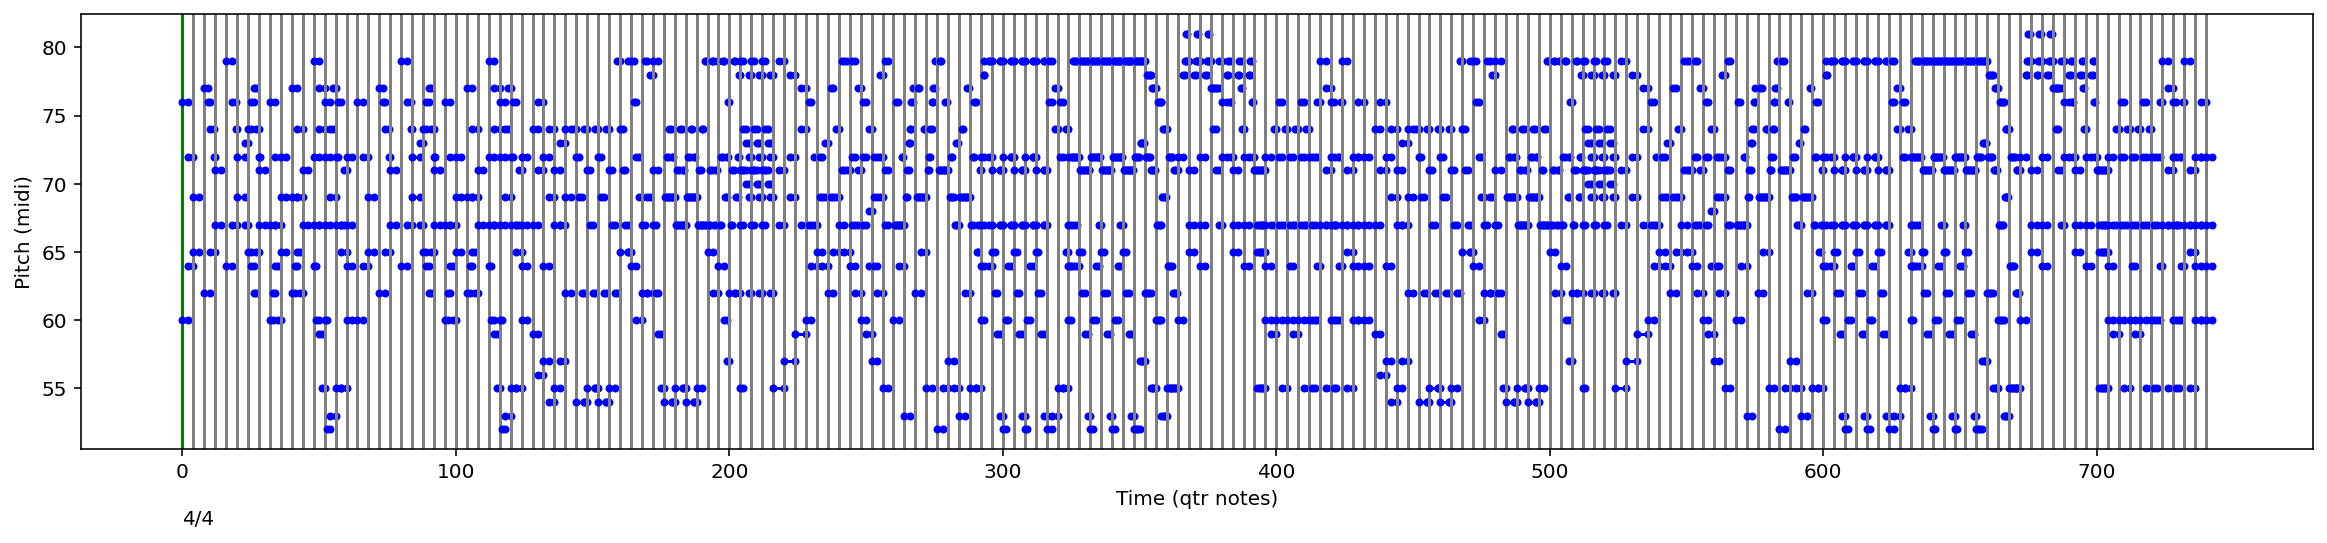

In [3]:
for part in dataset.songs[0].score.getElementsByClass(stream.Part):
    # part = part.chordify()
    print(f'Length: {part.duration.quarterLength}')
    plotPart(part)

# scores[0].show()

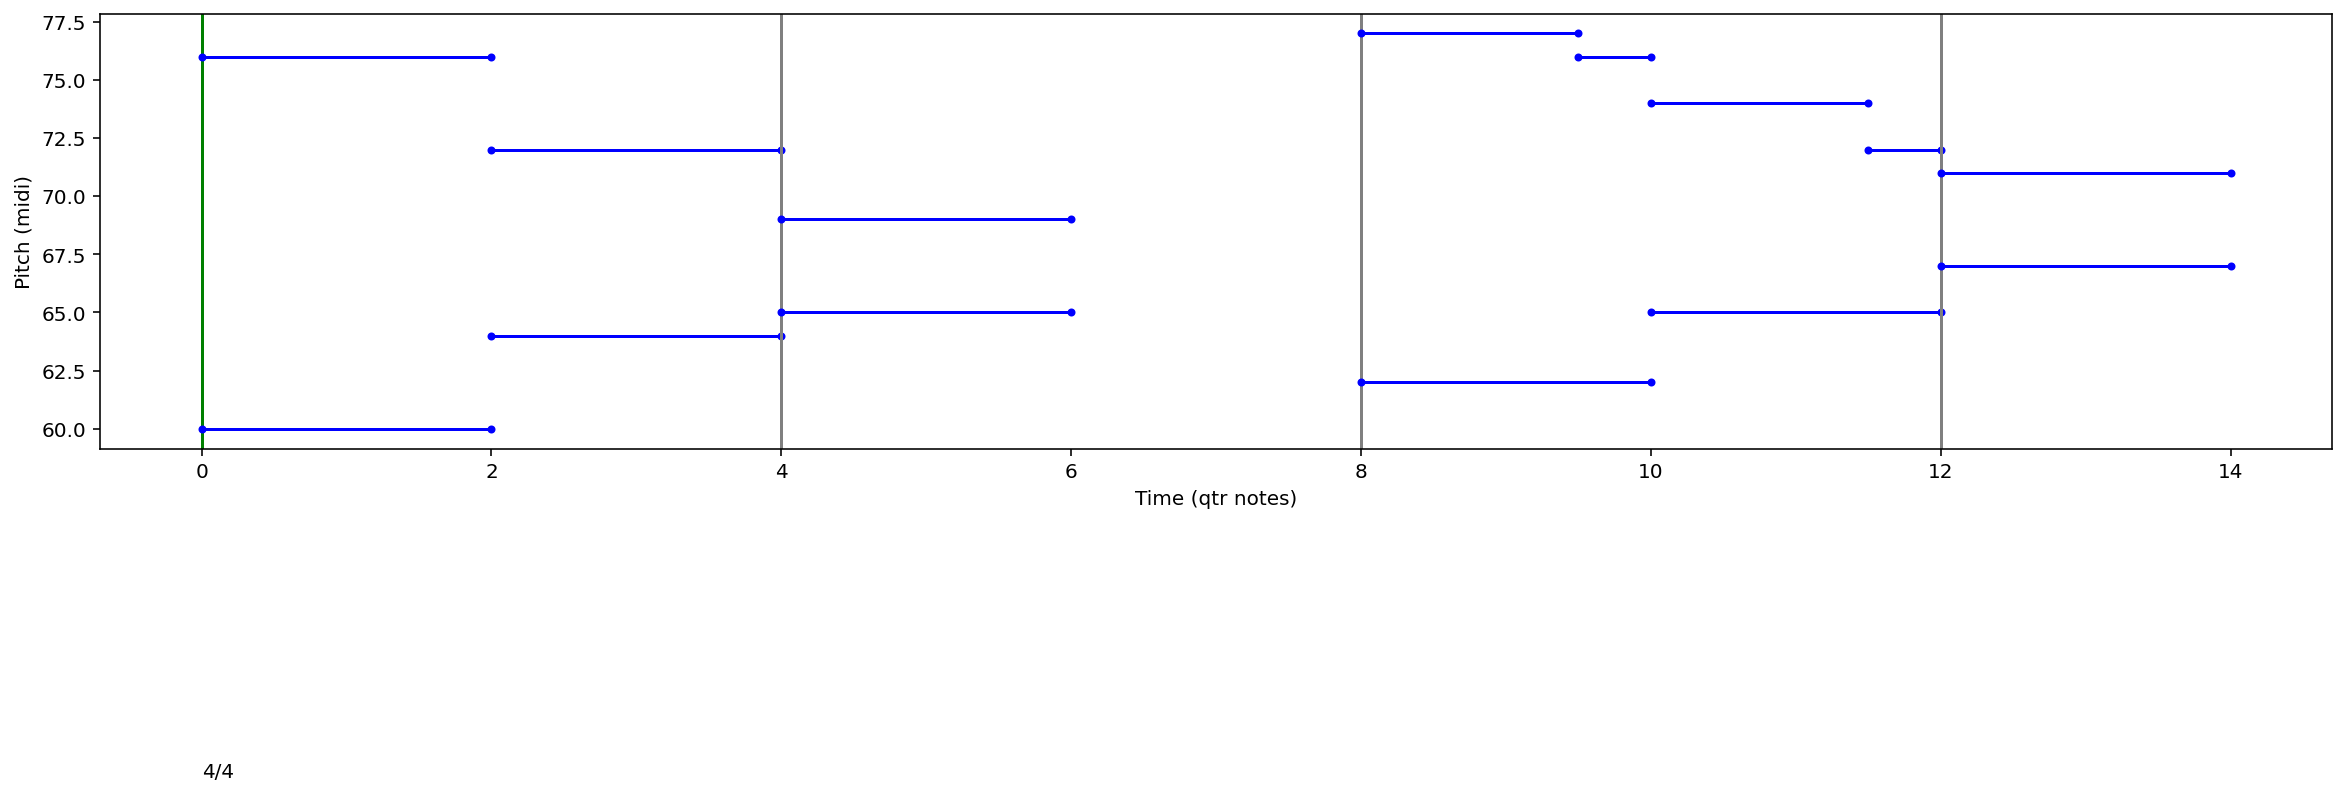

In [4]:
for part in dataset.songs[0].score.getElementsByClass(stream.Part):
    measures = part.getElementsByClass(stream.Measure)
        
    plotMeasures(measures[0:4])
        

Ignored 6 sequences from ../../../ml_training/music/mutopia_guitar/Matiegka3.mid
(40, 64, 128)


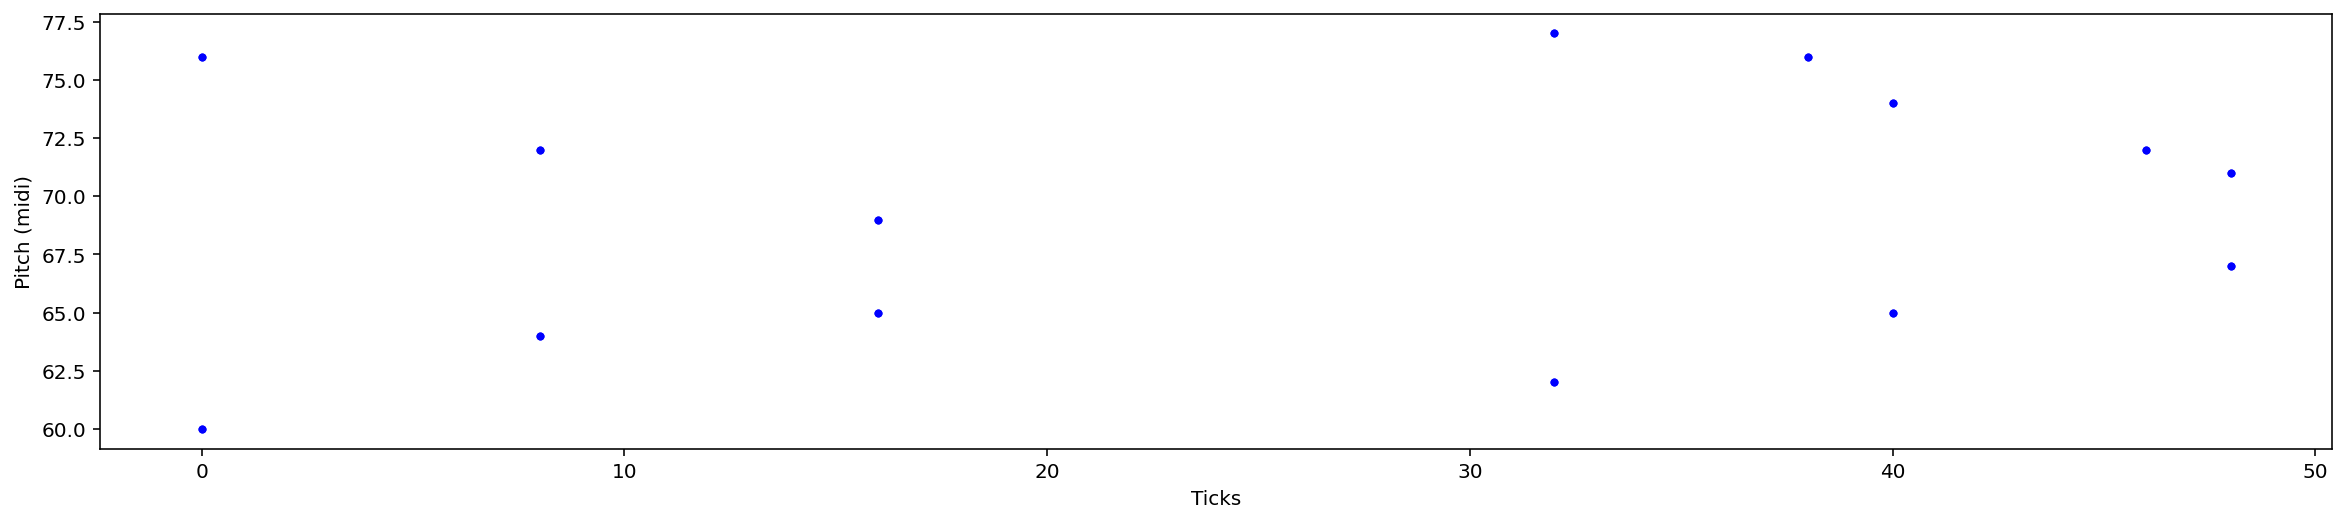

In [5]:
measuresPerSequence = 4
ticksPerQuarter = 4 # 4 = 16th notes, 12 = 16th notes + triplets

codec = SparseNoteSequenceCodec(ticksPerQuarter, measuresPerSequence, '4/4')
codec.initEncode(dataset)

print(dataset.sequences.shape)
plotSparseNoteSequence(dataset.sequences[0])

Ignored 6 sequences from ../../../ml_training/music/mutopia_guitar/Matiegka3.mid
(40, 340)


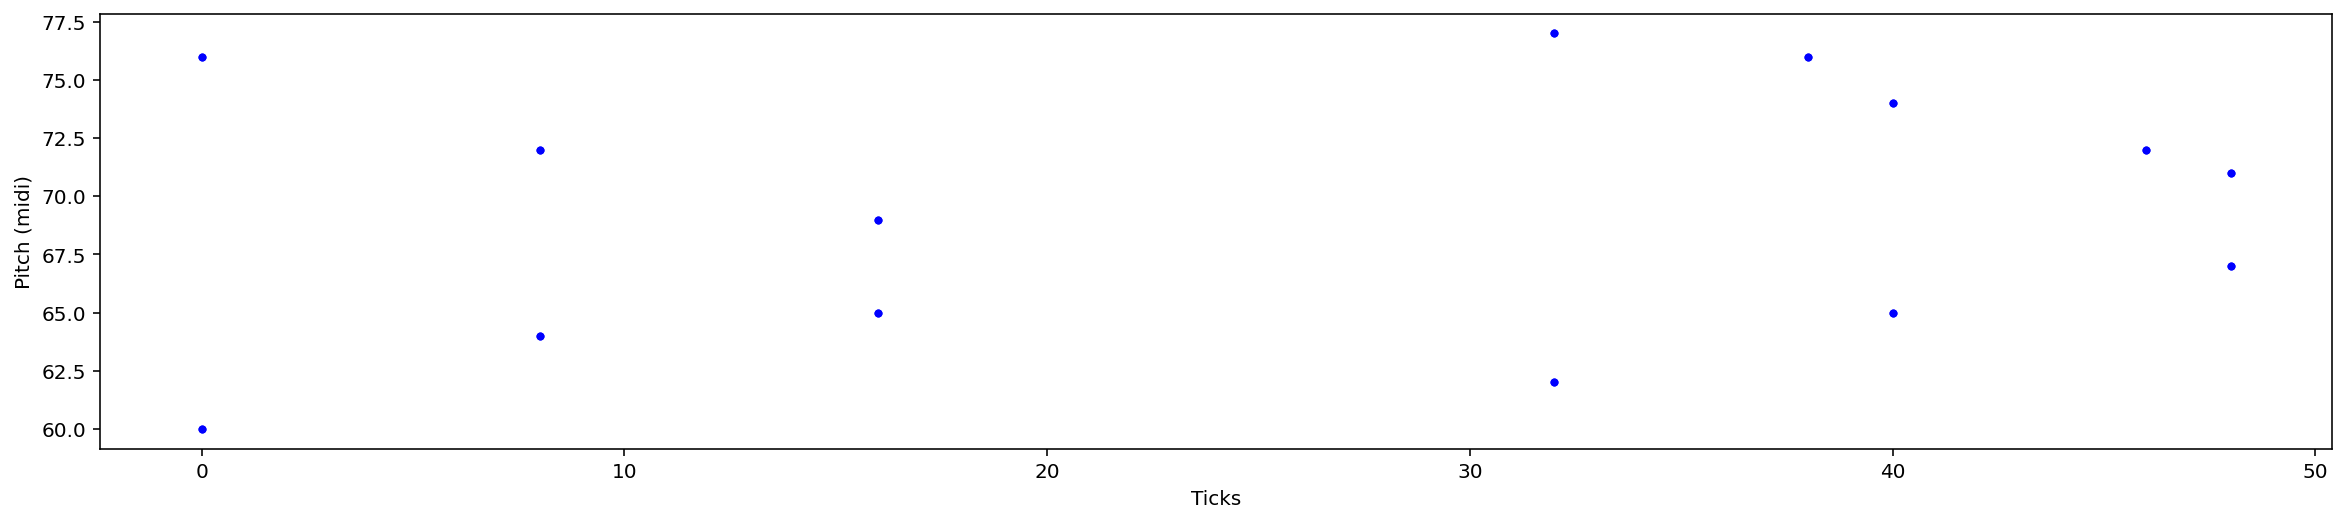

In [6]:
import numpy as np

measuresPerSequence = 4
ticksPerQuarter = 4 # 4 = 16th notes, 12 = 16th notes + triplets

codec =  (ticksPerQuarter, measuresPerSequence, '4/4')
codec.initEncode(dataset)

print(dataset.sequences.shape)

decoded = codec.decode(np.array([dataset.sequences[0]]))
plotSparseNoteSequence(decoded[0])